# Lab 1: Gradient descent
_Samuel Vaiter_ (<samuel.vaiter@cnrs.fr>)

In this practical, we are going to study the **gradient descent** algorithm, and several variations of it, through the lenses of three examples:
1. Two simple 2D functions to optimize, easy to visualize thanks to `matplotlib.pyplot.contour`
2. The ordinary least square problem
3. Digits classification with multinomial logistic regression

**Instructions**
1. You need to send me your completed jupyter notebook at <samuel.vaiter@cnrs.fr> **one week** (before start of class time + 168h) after the end of the session with subject 
    
    `[Opt Lab 1/2023] YEGHIAZARYAN Martiros`
    
2. All the Python cells should be error-free.
3. When a theoretical question is asked in a cell, fill your answer in Markdown/LaTeX in it. You should give the mathematical steps necessary to reproduce your answer.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Toy example in 2D

We are going to test first our methods on two functions, one convex (potentially strongly convex), the other not.

The convex function is going to be a simple quadratic form on $\mathbb{R}^2$ defined by
$$ f(x) = (x_0 - x_1 - 1)^2 + \frac{\mu}{2} x_0^2 , $$
for some $\mu \in \mathbb{R}$.

**Q1**. Does the function $f$ is convex? When is it strongly convex?

$$ \nabla f(x) = \begin{pmatrix}
2(x_0 - x_1 - 1) + {\mu}x_0\\
-2(x_0 - x_1 - 1)
\end{pmatrix} $$

$$ \nabla^2 f(x) = \begin{pmatrix}
2 + {\mu} & -2\\
-2 & 2
\end{pmatrix} $$

If $\mu \geq 0$ than $f$ is convex  SDP $<\nabla^2 f(x)h,h> \geq0$ 


**Q2**. Determine its unique minimizer when $\mu > 0$.

**Q3**. Implement it as a function `f2D_convex(x, mu=1.0)` taking as arguments the 2D vector `x` and the strong-convexity parameter `mu`.

In [ ]:
def f2D_convex(x, mu=1.0):
  return (x[0]-x[1]-1)**2 + 0.5*mu*x[0]**2

**Q4**. Display the levelsets of the function `f2D_convex` around $(0,0)$. Modify the value of $\mu$ and see how the geometry change. _Hint_: You should look at the help of `np.meshgrid`, `plt.contourf` and eventually `np.vectorize`.

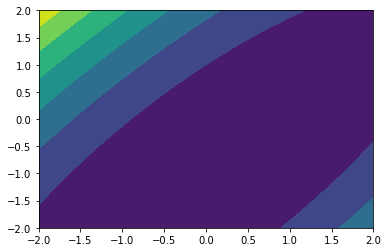

In [ ]:
# Display the level sets of `f2D_convex`
x = np.linspace(-2,2,50)
y = np.linspace(-2,2,50)
X,Y = np.meshgrid(x,y)
Z = np.vectorize(lambda x,y: f2D_convex(np.array([x,y])))(X,Y)
plt.contourf(X,Y,Z)

In [ ]:
y.shape

(50,)

**Q5**. Observe what happens when $\mu = 0$. Can you explain it?

In [ ]:
def f2D_convex(x, mu=0.0):
  return (x[0]-x[1]-1)**2 + 0.5*mu*x[0]**2

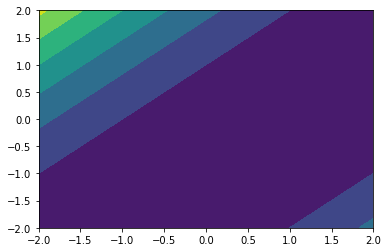

In [ ]:
# Display the level sets of `f2D_convex`
x = np.linspace(-2,2,50)
y = np.linspace(-2,2,50)
X,Y = np.meshgrid(x,y)
Z = np.vectorize(lambda x,y: f2D_convex(np.array([x,y])))(X,Y)
plt.contourf(X,Y,Z)

We now turn to another function, 
$$ f(x) = \cos(x_0) + \sin(x_1) . $$

**Q6**. Is it a convex function? Describe the minima of $f$.

** Complete

**Q7**. Implement it as a function `f2D_nonconvex(x)` taking as arguments the 2D vector `x`. Display its levelsets.

In [ ]:
def f2D_nonconvex(x):
 return np.cos(x[0]) + np.sin(x[1])

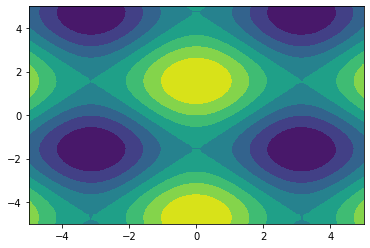

In [ ]:
# Display the level sets of `f2D_convex`
x = np.linspace(-5,5,50)
y = np.linspace(-5,5,50)
X,Y = np.meshgrid(x,y)
Z = np.vectorize(lambda x,y: f2D_nonconvex(np.array([x,y])))(X,Y)
plt.contourf(X,Y,Z)

## Gradient descent procedure

We recall that a gradient step takes the form
$$ x^{(t+1)} = x^{(t)} - \eta^{(t)} \nabla f(x^{(t)}) $$
with some initialization $x^{(0)}$ and $\eta^{(t)}$ a learning rate policy.

**Q1**. Implement a function `gradient_descent_tmp` taking as argument `grad_f`, `eta`, `x0` and `max_iter`. `grad_f` will take as input an optimization variable `x`, `eta` is the learning policy taking as arguments `x` and `t` the current iteration, `x0` is the initialization and `max_iter` a maximal number of iterations. As an example, a constant learning rate policy can defined as
```python
def constant_eta(x, t):
    return 0.01
```

In [ ]:
def gradient_descent_tmp(grad_f, eta, x0, max_iter):
    x = x0
    for t in range(max_iter):
      x = x - eta(x, t) * grad_f(x)
    return x

**Q2**. Implement a function `grad_f2D_convex` returning the gradient of the convex function defined in Section 1.

In [ ]:
def grad_f2D_convex(x, mu=1.0):
    return np.array([
      2 * (x[0] - x[1] - 1) + mu * x[0],
      -2 * (x[0] - x[1] - 1)
    ])

**Q3**. Compute the Lipschitz constant of $\nabla f(x)$ and deduce a learning rate policy `lr_policy_f2D-convex(x,t)`. Discuss the difference between $\mu = 0$ and $\mu \neq 0$.

In [ ]:
def hessian_f2D_convex(x, mu=1.0):
    return np.array([
        [2+mu, -2],
        [-2, 2]
    ])


def lr_policy_f2D_convex(x, t):
  return 1. / np.linalg.norm(hessian_f2D_convex(x), 2)

**Q4**. Test these functions, and observe the impact of `max_iter`

In [ ]:
gradient_descent_tmp(grad_f2D_convex, lr_policy_f2D_convex, np.zeros(2), 10)

array([ 0.1765725 , -0.77385011])

**Q5**. Implement a function `gradient_descent` taking as arguments `grad_f`, `eta`, `x0`, `max_iter` (defined as in *2.Q1*), `return_all` a boolean indicating if we keep in memory all iterates and `callback` a callable that is called at each iteration if not `None`. If `return_all` and `callback` are `None`, it should behave like `gradient_descent_tmp`. Otherwise, it should return a `dict` containing the final iterate, and eventually all the iterates and outputs of the callback. The function may look like the following stub
```python
def gradient_descent(grad_f, eta, x0, max_iter, return_all=False, callback=None):
    x = x0
    fxs = []
    xs = []
    # Do something
    if not callback and not return_all:
        return x
    else:
        return {
            'res': x,
            'callbacks': fxs,
            'iterates': xs,
        }
```

In [ ]:
def gradient_descent(grad_f, eta, x0, max_iter, return_all=False, callback=None):
    x = x0
    fxs = None
    xs = None
    
    if callback:
      fx0 = callback(x0)
      fxs = np.zeros((max_iter, *fx0.shape))
      fxs[0] = fx0 

    if return_all:
      xs = np.zeros((max_iter, *x0.shape))
      xs[0] = x0   

    for t in range(max_iter):
      x = x - eta(x,t) * grad_f(x)
      if return_all:
        xs[t] = x
      if callback:
        fxs[t] = callback(x)


    if not callback and not return_all:
        return x
    else:
        return {
            'res': x,
            'callbacks': fxs,
            'iterates': xs,
        }

**Q6**. Display the gradient descent on `f2D_convex` by plotting the function value both in linear scale, and loglog scale. Look at the documentation of `matplotlib.pyplot.loglog`.

Text(0, 0.5, '$\\log f(x^{(t)})$')

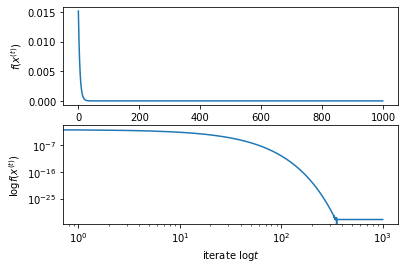

In [ ]:
max_iter = 1000
res = gradient_descent(grad_f2D_convex, lr_policy_f2D_convex, np.zeros(2), max_iter, return_all=True, callback=f2D_convex)
fig, ax = plt.subplots(2,1)
# BEGIN STUDENT CODE
ax[0].plot(np.arange(max_iter), res['callbacks'])
# END STUDENT CODE
ax[0].set_xlabel('iterate $t$')
ax[0].set_ylabel('$f(x^{(t)})$')
# BEGIN STUDENT CODE
ax[1].loglog(np.arange(max_iter), res['callbacks'])

# END STUDENT CODE
ax[1].set_xlabel('iterate $\log t$')
ax[1].set_ylabel('$\log f(x^{(t)})$')

**Q7**. Visualize the gradient steps on a contour plot. Try several initializations. Try several step-sizes.

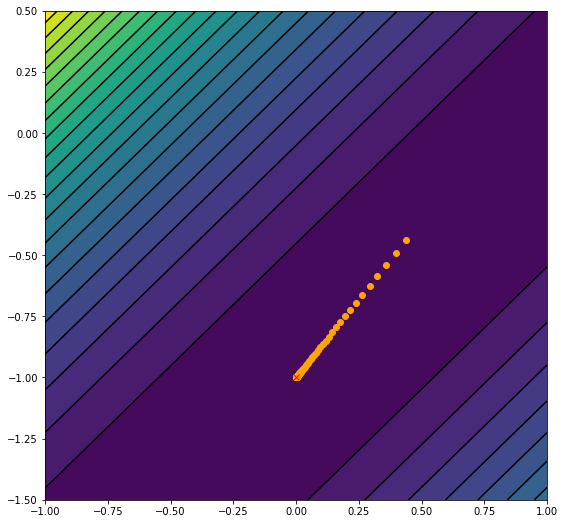

In [ ]:
x = np.linspace(-1,1,50)
y = np.linspace(-1.5,0.5,50)
X,Y = np.meshgrid(x,y)
Z = np.vectorize(lambda x,y: f2D_convex(np.array([x,y])))(X,Y)

fig, ax = plt.subplots(figsize=(9, 9))
ax.contourf(X, Y, Z, 20)
ax.contour(X,Y,Z, 20, colors='k')

# Display the iterates
xs = res['iterates']
# BEGIN STUDENT CODE
for t in range(max_iter):
  x = xs[t]
  ax.plot(x[0], x[1], marker='o', color='orange')
# END STUDENT CODE
sol = np.array([0,-1])
ax.plot(sol[0],sol[1],marker='x', color ='red')

## Let's go to higher dimension.

For a matrix $A \in \mathbb{R}^{n \times p}$ and a vector $b \in \mathbb{R}^{n}$, the least-square objective reads
$$ f(x) = \frac{1}{2} \| A x - b \|_2^2 . $$

**Q1**. Generate a matrix `A` of size 100 by 200 with i.i.d. normal entries and `b` also i.i.d. normal.

In [ ]:
n, p = 100, 200
rng = np.random.default_rng()
# BEGIN STUDENT CODE
A = rng.normal(size=(n, p))
b = rng.normal(size=n)
# END STUDENT CODE

**Q2**. Implement `least_square` and its gradient `grad_least_square` with respect to `x`.

In [ ]:
def least_square(x):
# BEGIN STUDENT CODE
  return 0.5 * np.linalg.norm(A @ x - b) ** 2
# END STUDENT CODE

def grad_least_square(x):
# BEGIN STUDENT CODE
  return A.T @ (A @ x - b)
# END STUDENT CODE

**Q3**. Compute the Lipschitz constant $L$ of $\nabla f$ and write a learning rate policy `lr_policy_least_square` _independant_ from the strong-convexity constant.

In [ ]:
def lr_policy_least_square(x, t):
# BEGIN STUDENT CODE
# END STUDENT CODE

**Q4**. Run the gradient descent with the obtained policy, and plot in semilogy scale the evolution of the objective function. 

In [ ]:
res = gradient_descent(grad_least_square, lr_policy_least_square, np.zeros(p), 1000, return_all=True, callback=least_square)
fig, ax = plt.subplots()
sol = np.linalg.lstsq(A, b, rcond=None)[0]
# BEGIN STUDENT CODE
# END STUDENT CODE
ax.set_xlabel('iterate $t$')
ax.set_ylabel('$\log f(x^{(t)})$')

**Q5**. Perform the same experiment with `A` of size 100 x 100. Does the numerics confirm the theory studied in the lecture? If not, how to explain this behavior? If yes, explain.

## Digits classification

We now turn our attention to a classification problem.
For the sake of simplicity, we will use the digits UCI ML dataset contained in `scikit-learn`

In [ ]:
# Load digits dataset, note that the first time you run this, it will download the dataset (could take a while)
from sklearn.datasets import load_digits

This dataset is composed of 1797 samples, each of theme of size $8 \times 8 = 64$ in gray level (coded on [0,255]).
This is a low resolution dataset that will be easy to treat as a "batch".
We can access the data as vectors in `digits.data` and as images in `digits.images`.
The labels are contained in `digits.target`.

In [ ]:
digits = load_digits()
(n_samples, n_features) = digits.data.shape
print(f"Dataset dimensions: {(n_samples, n_features)}")

# Display a few digits
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
idx = [0, 42, 345, 826]
for i, ax in enumerate(axs.ravel()):
    ax.imshow(digits.images[idx[i]], cmap='gray')
    ax.set_title(f"Label {digits.target[idx[i]]}")
    ax.axis('off')

**Q1**. Using `sklearn.model_selection.train_test_split`, split the dataset into a training and a test sets.
Center the training and the test set relative to the mean image of the training set.
Add a column of ones to take into account the potential bias term

In [ ]:
# Split the dataset into train and test with a 80/20 ratio
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, test_size=0.2, random_state=42
)

# Center the data
X_train = (X_train - X_train.mean(axis=0))
X_test = (X_test - X_train.mean(axis=0))

# Add a column of ones to the data to account for the bias
X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])

To perform our classification task, we will turn to the multinomial logistic regression, or softmax classification.
The objective function here will be seek a weight matrix $W \in \mathbb{R}^{K \times p}$

$$ f(W) = \sum_{i=1}^n \sum_{k=0}^{K-1} [y_i = k] \log(\hat p(y_i = k | X_i)) + \lambda \| W \|_2^2, $$
where
$$ \hat p(y_i = k | X_i) = \frac{\exp(X_i W_k)}{\sum_{l=0}^{K-1}\exp(X_i W_l)} . $$

**Numerical stability of the softmax**. When computing the softmax of a vector, one has to be careful of the potential numerical errors due to the large values of $\exp$ when the argument is above 0.

In [ ]:
scores = np.array([433, 23, 766])
proba = np.exp(scores) / np.sum(np.exp(scores))
proba

Clearly here, we would expect to obtain `[0., 0., 1.]`.
Remark that for any $c > 0$,
$$
\sigma(z)_i
=
\frac{\exp(z_i)}{\sum_{i=1}^p \exp{(z_j)}}
=
\frac{c\exp(z_i)}{c\sum_{i=1}^p \exp{(z_j)}}
=
\frac{\exp(z_i + \log c)}{\sum_{i=1}^p \exp{(z_j + \log c)}}
$$
A typical choice of $c$ is given by the solution of $\log c = - \max_j z_j$.

In [ ]:
scores = np.array([433, 23, 766])
scores -= np.max(scores)
proba = np.exp(scores) / np.sum(np.exp(scores))
proba

**Q2**. Implement the `softmax_loss` function below. Take care to the potential numerical errors thanks to the trick above. _Hint_: remember that `numpy.arange(n)` build a ndarray containing all integer from 0 to `n` (included).

In [ ]:
def softmax_loss(W, X, y, reg):
    """
    Softmax loss function

    Inputs:
    - W: ndarray (n_features, K) containing weights.
    - X: ndarray (n, n_features) containing data.
    - y: ndarray (n,) containing training labels
    - reg: (float) regularization

    Returns the softmax loss (with regularization)
    """
# BEGIN STUDENT CODE
# END STUDENT CODE

To debug it, run the following cell. You should obtain a value close to $-\log(1/10)$.

**Q3**: Why should we obtain something close to this value?

In [ ]:
# Generate a random softmax weight matrix
W = np.random.randn(64+1, 10) * 0.001
# Compute the softmax loss
loss = softmax_loss(W, X_train, y_train, 0.0)

# As a rough sanity check, our loss should be something more or less close to -log(0.1).
print(f"Loss: {loss}, expected: {-np.log(0.1)}")

**Q4**. Compute the gradient of the loss $\nabla f(W)$ with respect to weight matrix.

**Q5**. Implement the gradient of the softmax loss as a `softmax_grad` function below. _Hint_: This function will be _very_ close to `softmax_loss`. Note that it would be more adequate to write a unique function returning _both_ the loss and the gradient.

In [ ]:
def softmax_grad(W, X, y, reg):
# BEGIN STUDENT CODE
# END STUDENT CODE

**Q6**. Run the gradient descent on the loss function defined by the training set. You should use a constant step size policy. _Hint_: define `softmax_grad_train` and `softmax_loss_train` taking only `W` as input.

In [ ]:
reg = 0.001

# BEGIN STUDENT CODE
# END STUDENT CODE

fig, ax = plt.subplots()
ax.plot(res['callbacks'])
ax.set_xlabel('iterate $t$')
ax.set_ylabel('$f(x^{(t)})$')

**Q7**. Display the training and test accuracies. Comment.

In [ ]:
# BEGIN STUDENT CODE
# END STUDENT CODE